In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing dataset

In [3]:
df=pd.read_csv('Online payment fraud detection.csv')

In [4]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [30]:
data=df.drop(['nameOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud'],axis=1)

In [31]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0
2,1,TRANSFER,181.00,181.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0
...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,1


In [85]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [35]:
print(x)

         step      type      amount  oldbalanceOrg  newbalanceOrig
0           1   PAYMENT     9839.64      170136.00       160296.36
1           1   PAYMENT     1864.28       21249.00        19384.72
2           1  TRANSFER      181.00         181.00            0.00
3           1  CASH_OUT      181.00         181.00            0.00
4           1   PAYMENT    11668.14       41554.00        29885.86
...       ...       ...         ...            ...             ...
6362615   743  CASH_OUT   339682.13      339682.13            0.00
6362616   743  TRANSFER  6311409.28     6311409.28            0.00
6362617   743  CASH_OUT  6311409.28     6311409.28            0.00
6362618   743  TRANSFER   850002.52      850002.52            0.00
6362619   743  CASH_OUT   850002.52      850002.52            0.00

[6362620 rows x 5 columns]


In [36]:
print(y)

         isFraud
0              0
1              0
2              1
3              1
4              0
...          ...
6362615        1
6362616        1
6362617        1
6362618        1
6362619        1

[6362620 rows x 1 columns]


<AxesSubplot:xlabel='type', ylabel='count'>

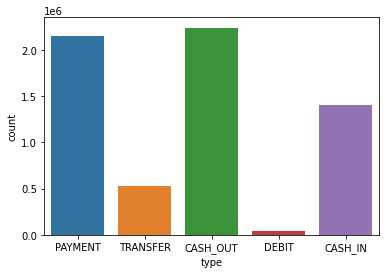

In [28]:
sns.countplot(data=df,x='type')

In [47]:
#sns.barplot(x='type',y='amount',data=df)

In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

## distribution plot

In [ ]:
#plt.figure(figsize=(15,6))
#sns.distplot(df['step'])

## encoding

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),['type'])],remainder='passthrough')
x=np.array(ct.fit_transform(x)) ##fit calculate transform replacing

In [52]:
x

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.83964000e+03, 1.70136000e+05, 1.60296360e+05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.86428000e+03, 2.12490000e+04, 1.93847200e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.81000000e+02, 1.81000000e+02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.31140928e+06, 6.31140928e+06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.50002520e+05, 8.50002520e+05, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.50002520e+05, 8.50002520e+05, 0.00000000e+00]])

In [86]:
import category_encoders as ce
import numpy as np
encoder=ce.OneHotEncoder(cols='type',use_cat_names=True)
x=encoder.fit_transform(x)

print(x)

         step  type_PAYMENT  type_TRANSFER  type_CASH_OUT  type_DEBIT  \
0           1             1              0              0           0   
1           1             1              0              0           0   
2           1             0              1              0           0   
3           1             0              0              1           0   
4           1             1              0              0           0   
...       ...           ...            ...            ...         ...   
6362615   743             0              0              1           0   
6362616   743             0              1              0           0   
6362617   743             0              0              1           0   
6362618   743             0              1              0           0   
6362619   743             0              0              1           0   

         type_CASH_IN      amount  oldbalanceOrg  newbalanceOrig  
0                   0     9839.64      170136.00       1

In [81]:
#x=np.array(x)

In [87]:
x

,step,type_PAYMENT,type_TRANSFER,type_CASH_OUT,type_DEBIT,type_CASH_IN,amount,oldbalanceOrg,newbalanceOrig
0,1,1,0,0,0,0,9839.64,170136.00,160296.36
1,1,1,0,0,0,0,1864.28,21249.00,19384.72
2,1,0,1,0,0,0,181.00,181.00,0.00
3,1,0,0,1,0,0,181.00,181.00,0.00
4,1,1,0,0,0,0,11668.14,41554.00,29885.86
...,...,...,...,...,...,...,...,...,...
6362615,743,0,0,1,0,0,339682.13,339682.13,0.00
6362616,743,0,1,0,0,0,6311409.28,6311409.28,0.00
6362617,743,0,0,1,0,0,6311409.28,6311409.28,0.00
6362618,743,0,1,0,0,0,850002.52,850002.52,0.00


In [82]:
print(y)

         isFraud
0              0
1              0
2              1
3              1
4              0
...          ...
6362615        1
6362616        1
6362617        1
6362618        1
6362619        1

[6362620 rows x 1 columns]


In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [67]:
x_train

,step,type_PAYMENT,type_TRANSFER,type_CASH_OUT,type_DEBIT,type_CASH_IN,amount,oldbalanceOrg,newbalanceOrig
2276631,187,1,0,0,0,0,1607.27,0.00,0.00
1580855,155,1,0,0,0,0,16958.15,416.00,0.00
1080958,129,0,0,1,0,0,249226.07,11335.00,0.00
4557677,327,0,0,0,0,1,217722.54,4383327.55,4601050.10
3092419,235,0,0,0,0,1,34150.62,5735503.44,5769654.06
...,...,...,...,...,...,...,...,...,...
5030793,354,0,0,1,0,0,156973.09,257335.00,100361.91
491263,19,0,0,1,0,0,140745.33,0.00,0.00
3937352,286,0,0,1,0,0,128095.40,0.00,0.00
4686059,331,1,0,0,0,0,5504.70,0.00,0.00


In [68]:
x_test

,step,type_PAYMENT,type_TRANSFER,type_CASH_OUT,type_DEBIT,type_CASH_IN,amount,oldbalanceOrg,newbalanceOrig
6322570,688,0,0,0,0,1,23557.12,8059.00,31616.12
3621196,274,1,0,0,0,0,6236.13,0.00,0.00
1226256,133,1,0,0,0,0,33981.87,18745.72,0.00
2803274,225,0,0,1,0,0,263006.42,20072.00,0.00
3201247,249,0,0,1,0,0,152013.74,20765.00,0.00
...,...,...,...,...,...,...,...,...,...
2915604,229,0,0,0,0,1,127281.18,347953.00,475234.18
6168411,552,0,0,0,0,1,229381.34,10223051.44,10452432.78
970319,44,0,0,1,0,0,353801.58,0.00,0.00
1329756,137,1,0,0,0,0,37659.34,360829.27,323169.93


In [114]:
print(x_train)

         step  type_PAYMENT  type_TRANSFER  type_CASH_OUT  type_DEBIT  \
2276631   187             1              0              0           0   
1580855   155             1              0              0           0   
1080958   129             0              0              1           0   
4557677   327             0              0              0           0   
3092419   235             0              0              0           0   
...       ...           ...            ...            ...         ...   
5030793   354             0              0              1           0   
491263     19             0              0              1           0   
3937352   286             0              0              1           0   
4686059   331             1              0              0           0   
4322341   308             1              0              0           0   

         type_CASH_IN     amount  oldbalanceOrg  newbalanceOrig  
2276631             0    1607.27           0.00          

In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[['amount','oldbalanceOrg','newbalanceOrig']]=sc.fit_transform(x_train[['amount','oldbalanceOrg','newbalanceOrig']])
x_test[['amount','oldbalanceOrg','newbalanceOrig']]=sc.transform(x_test[['amount','oldbalanceOrg','newbalanceOrig']])

In [118]:
print(x_train)

         step  type_PAYMENT  type_TRANSFER  type_CASH_OUT  type_DEBIT  \
2276631   187             1              0              0           0   
1580855   155             1              0              0           0   
1080958   129             0              0              1           0   
4557677   327             0              0              0           0   
3092419   235             0              0              0           0   
...       ...           ...            ...            ...         ...   
5030793   354             0              0              1           0   
491263     19             0              0              1           0   
3937352   286             0              0              1           0   
4686059   331             1              0              0           0   
4322341   308             1              0              0           0   

         type_CASH_IN    amount  oldbalanceOrg  newbalanceOrig  
2276631             0 -0.294472      -0.288640       -0.29

In [155]:
from sklearn.tree import DecisionTreeRegressor 
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [158]:
import numpy as np
y_test=np.array(y_test)
y_pred = classifier.predict(x_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis = 1))

[0 0 0 ... 0 0 0]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [159]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [162]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1270778      99]
 [    383    1264]]


0.999621225218542

In [177]:
feature=[[688,0,0,0,0,1,-0.258218,-0.285850,-0.281546]]
print(regressor.predict(feature))

[0.]


C:\Users\SHUBA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [166]:
y_train=np.array(y_train)

In [167]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [168]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(x_train, y_train)

C:\Users\SHUBA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHUBA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [170]:
import numpy as np
y_test=np.array(y_test)
y_pred = classifier.predict(x_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis = 1))

[0 0 0 ... 0 0 0]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [172]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1270822      55]
 [   1054     593]]


0.9991285036667285